In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
sns.set_palette('Set1')
import matplotlib.ticker as ticker
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
school = pd.read_csv('school.csv')
school.shape

(1160, 34)

In [3]:
pd.set_option('display.max_columns', None)

## Preview dataset

In [4]:
school.head(1)

,Unnamed: 0,status,submitter.city,submitter.state,submitter.postal_code,Account.Holder,Grade.Entering,First.choice.school,Second.choice.school,Third.choice.school,Fourth.choice.school,Fifth.choice.school,First.choice.program,Second.choice.program,Third.choice.program,MG.Sports,MG.STEM,MG.STEM.Activities,MG.Activities,Attend.DPSCD,DPSCD.School,Attend.Other,SEM.School,Interests,Cumul.GPA,GPA.Multiplier,Overall.Exam.Score,GPA.Score,Essay.Score,DPSCD.Bonus,Total.App.Score,HHS.Bonus,Assignment,Assignment.Ranked.Choice
0,0,Accepted,Detroit,MI,48221,Parent/Guardian,9,Heritage High School,Pacific High School,Hawking High School,Silverado High School,Eastside High School,"Math, Science and Applied Technology (MSAT)",Computer Information Systems and Commerce (CISC),"Sports Management, Marketing and Medicine",NaN,NaN,NaN,NaN,Yes,Pine Hills,No,NaN,Fine and Performing Arts (music&#44; dance&#44...,3.7361,NaN,39.055924,33.0,20.0,10,102.055924,10,Heritage High School,First


Rename index

In [5]:
school = school.rename_axis('Applicant')

#### Rename and reassign columns of interest for better readability

In [6]:
school = school.rename(columns={'status':'Application Status','Attend.DPSCD': 'Current DPSCD Student', 'Cumul.GPA': 'Cumulative GPA', 'First.choice.school': 'Top Ranked Examination High School', 'DPSCD.Bonus': 'Recieved Bonus Points (Given to DPSCD Applicants)','Overall.Exam.Score':'Overall Exam Score', 'Total.App.Score':'Total Application Score', 'GPA.Score':'Total GPA Score', 'Essay.Score':'Essay Score', 'Assignment.Ranked.Choice':'Rank of Applicants Final Placement'})
school['Current DPSCD Student'] = school['Current DPSCD Student'].replace({'Yes': 'DPSCD Applicant', 'No': 'Non-DPSCD Applicant'})

# Analysis of Applicant Assignment August 2020 dataset

### Can you tell me anything about the quality of the applicants?

In [7]:
school.describe()

,Unnamed: 0,Grade.Entering,Cumulative GPA,Overall Exam Score,Total GPA Score,Essay Score,Recieved Bonus Points (Given to DPSCD Applicants),Total Application Score,HHS.Bonus
count,1160.000000,1160.0,1159.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,579.500000,9.0,2.845904,17.009017,22.496983,12.357586,6.637931,58.501517,1.258621
std,335.007463,0.0,0.837842,6.244357,8.738014,4.409832,4.726144,15.463131,2.803981
min,0.000000,9.0,0.000000,2.830226,0.000000,0.000000,0.000000,12.093292,0.000000
25%,289.750000,9.0,2.458675,12.406341,17.000000,9.000000,0.000000,47.424552,0.000000
50%,579.500000,9.0,3.000000,16.357246,24.000000,13.000000,10.000000,58.470848,0.000000
75%,869.250000,9.0,3.452300,21.314278,29.000000,16.000000,10.000000,69.798185,0.000000
max,1159.000000,9.0,4.000000,39.055924,35.000000,20.000000,10.000000,102.055924,10.000000


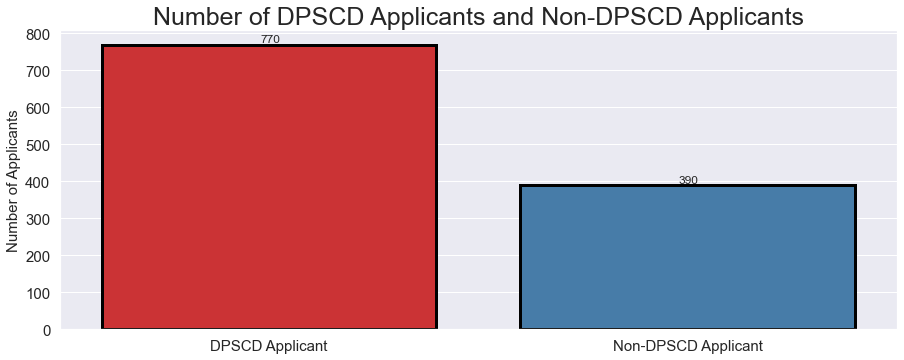

In [8]:
plt.figure(figsize=(15, 5.5))
plt.title('Number of DPSCD Applicants and Non-DPSCD Applicants', fontsize=25)
app = sns.countplot(x=school['Current DPSCD Student'], data=school, edgecolor='black', linewidth=3, order = school['Current DPSCD Student'].value_counts().index)
for p in app.patches:
    app.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (1, 5), textcoords = 'offset points')
    app.set_ylabel('Number of Applicants', fontsize=15)
    app.set_xlabel('Current DPSCD Student' ,fontsize=15)
    plt.xlabel('')
    plt.tick_params(labelsize=15)

Extract a dataframe of the target data and export to CSV for later use

In [9]:
num_apps = pd.DataFrame(school, columns=['Current DPSCD Student'])
num_apps.to_csv('num_apps.csv', index=False)

## How did applicants from DPSCD schools compare to other schools?

Replace any **0** values with **NA** because some plots are sensitive to such extreme outliers

In [10]:
school.replace(0, np.nan, inplace=True)

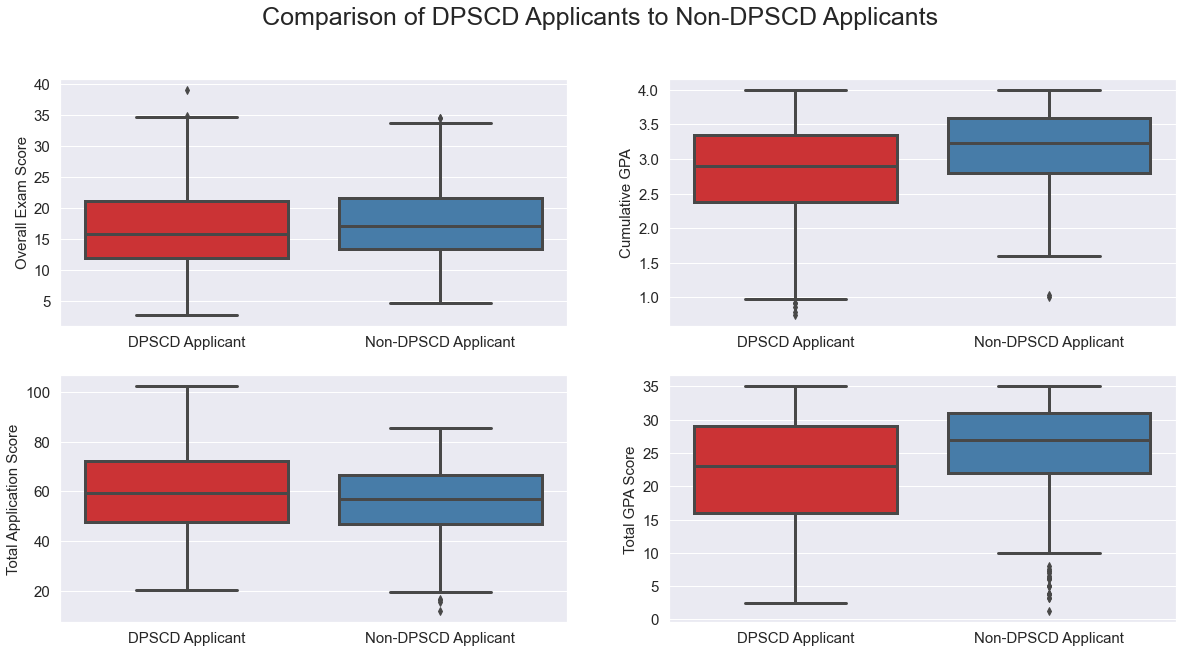

In [11]:
x = ['Current DPSCD Student']
native_compare = ['Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']
plt.figure(figsize=(20, 10))
cnt = 1
for comp in native_compare:
    plt.subplot(2,2, cnt)
    plt.suptitle('Comparison of DPSCD Applicants to Non-DPSCD Applicants', fontsize=25)
    sns.boxplot(x='Current DPSCD Student', y=comp, data=school, linewidth=3)
    plt.ylabel(comp, fontsize=15)
    plt.xlabel('')
    plt.tick_params(labelsize=15)
    plt.xticks(fontsize=15, horizontalalignment='center')
    cnt=cnt+1
plt.show()

DPSCD extra points

Extract a dataframe of the target data and export to CSV for later use

In [12]:
overall_dpscd_comparison = pd.DataFrame(school, columns=['Current DPSCD Student', 'Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score'])
overall_dpscd_comparison.to_csv('overall_dpscd_comparison.csv', index=False)

## Highest Five Performance Metrics and Applicant Interests

It appears that the survey given to applicants allowed multiple choices be selected for their **'Interests'**. I will strip off redundant for easier readability.

In [13]:
school.Interests = school.Interests.str.replace(r"(\s*\(.*?\)\s*)", " ").str.strip()

#### Parse data to create a table of the highest 5 applicants.Group them by one of the four performance metrics and applicant interest, then sort by that performance metric.

In [14]:
overall_exam = school[['Current DPSCD Student','Interests','Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']].loc[school.groupby('Interests')['Overall Exam Score'].idxmax()].sort_values('Overall Exam Score', ascending=False)[:5]

In [15]:
cumulative_gpa = school[['Current DPSCD Student','Interests','Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']].loc[school.groupby('Interests')['Cumulative GPA'].idxmax()].sort_values('Cumulative GPA', ascending=False)[:5]

In [16]:
total_app_score = school[['Current DPSCD Student','Interests','Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']].loc[school.groupby('Interests')['Total Application Score'].idxmax()].sort_values('Total Application Score', ascending=False)[:5]

In [17]:
total_gpa_score = school[['Current DPSCD Student','Interests','Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']].loc[school.groupby('Interests')['Total GPA Score'].idxmax()].sort_values('Total GPA Score', ascending=False)[:5]

Text(0.5, 1.0, 'Applicants with Highest Five Total GPA Score their Interests')

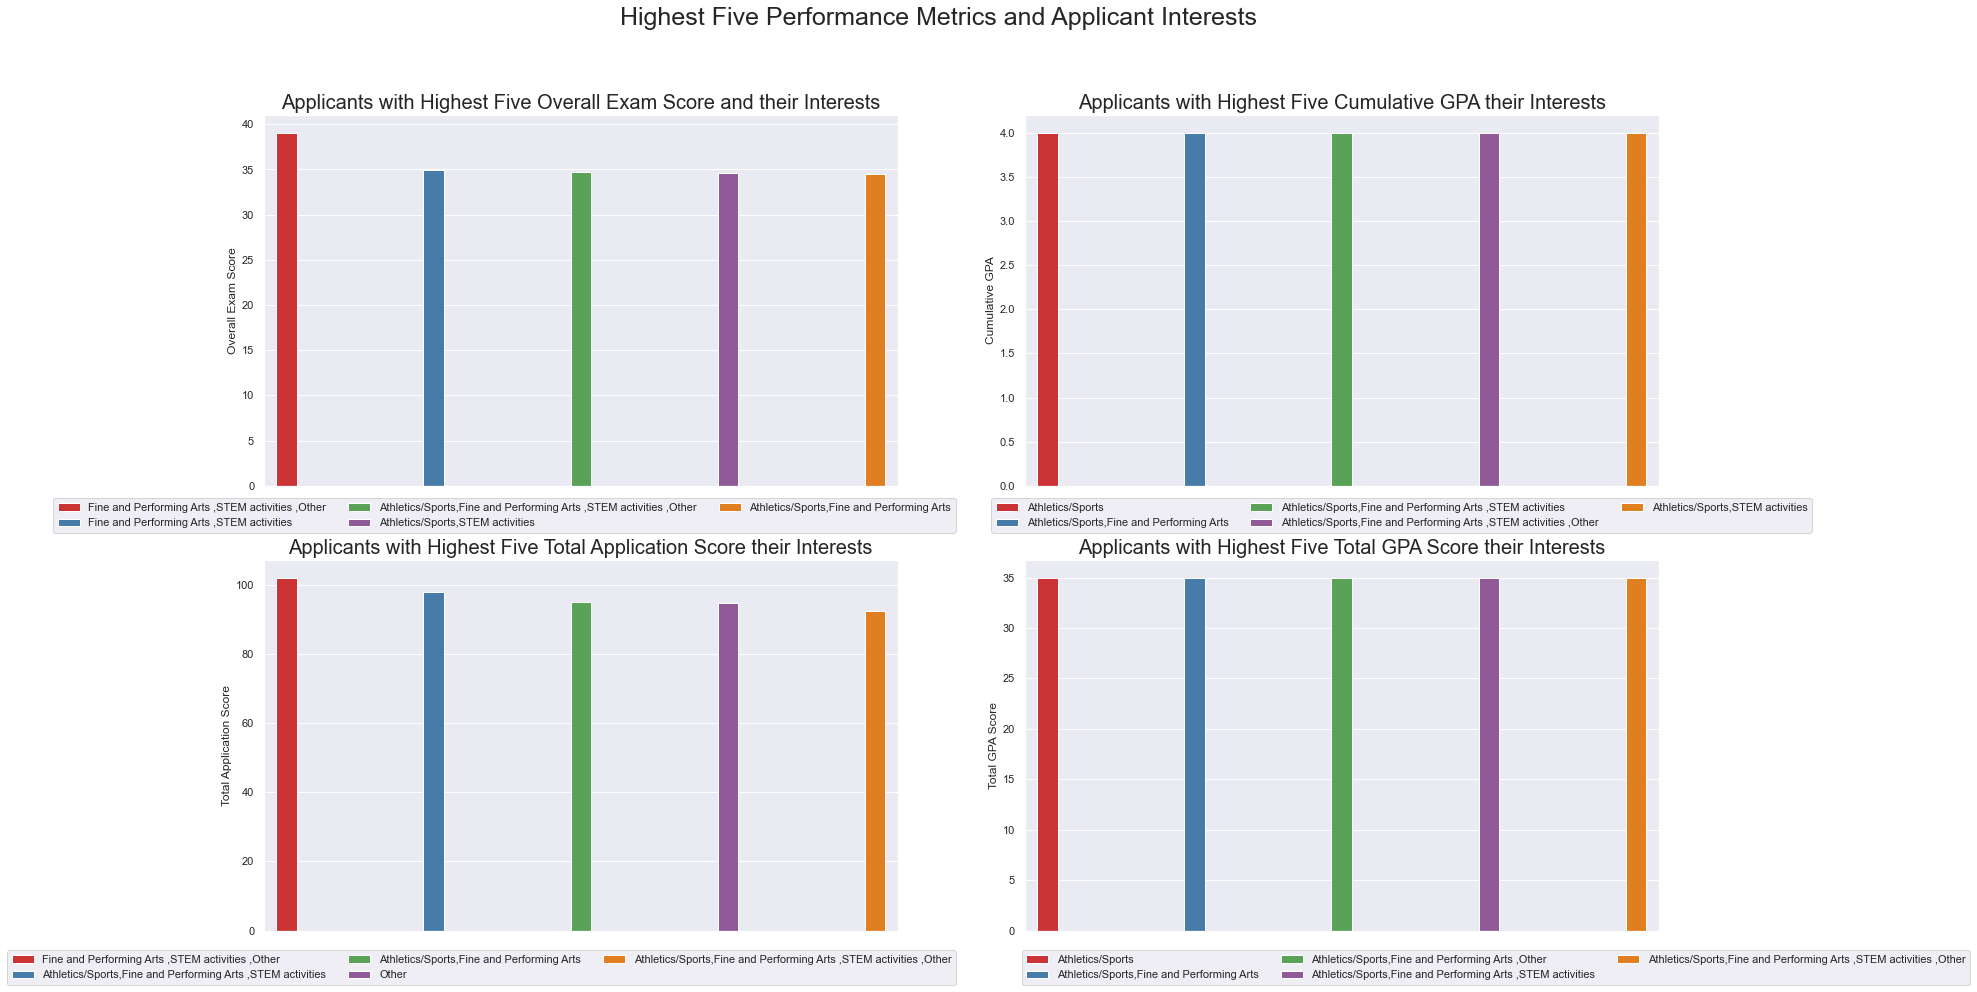

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(25, 15))
fig.suptitle('Highest Five Performance Metrics and Applicant Interests', fontsize=25)

exam_score = sns.barplot(ax=axes[0, 0], x=overall_exam['Interests'], y=overall_exam['Overall Exam Score'], hue=overall_exam['Interests'], data=overall_exam)
exam_score.legend(loc='center right', bbox_to_anchor=(1.10, -0.08), ncol=3)
exam_score.set_ylabel('Overall Exam Score')
exam_score.set_xticks([])
exam_score.set_xlabel('')
exam_score.axes.set_title('Applicants with Highest Five Overall Exam Score and their Interests',fontsize=20)

c_gpa = sns.barplot(ax=axes[0, 1],  x=cumulative_gpa['Interests'], y=cumulative_gpa['Cumulative GPA'], hue=cumulative_gpa['Interests'], data=cumulative_gpa)
c_gpa.legend(loc='center right', bbox_to_anchor=(1.25, -0.08), ncol=3)
c_gpa.set_ylabel('Cumulative GPA')
c_gpa.set_xticks([])
c_gpa.set_xlabel('')
c_gpa.axes.set_title('Applicants with Highest Five Cumulative GPA their Interests',fontsize=20)

app_score = sns.barplot(ax=axes[1, 0], x=total_app_score['Interests'], y=total_app_score['Total Application Score'], hue=total_app_score['Interests'], data=total_app_score)
app_score.legend(loc='center right', bbox_to_anchor=(1.10, -0.1), ncol=3)
app_score.set_ylabel('Total Application Score')
app_score.set_xticks([])
app_score.set_xlabel('')
app_score.axes.set_title('Applicants with Highest Five Total Application Score their Interests',fontsize=20)

gpa_score = sns.barplot(ax=axes[1, 1], x=total_gpa_score['Interests'] , y=total_gpa_score['Total GPA Score'], hue=total_gpa_score['Interests'], data=total_gpa_score)
gpa_score.legend(loc='center right', bbox_to_anchor=(1.50, -0.1), ncol=3)
gpa_score.set_ylabel('Total GPA Score')
gpa_score.set_xticks([])
gpa_score.set_xlabel('')
gpa_score.axes.set_title('Applicants with Highest Five Total GPA Score their Interests',fontsize=20)

## Comparison of Performance Metrics and Applicant Application Status

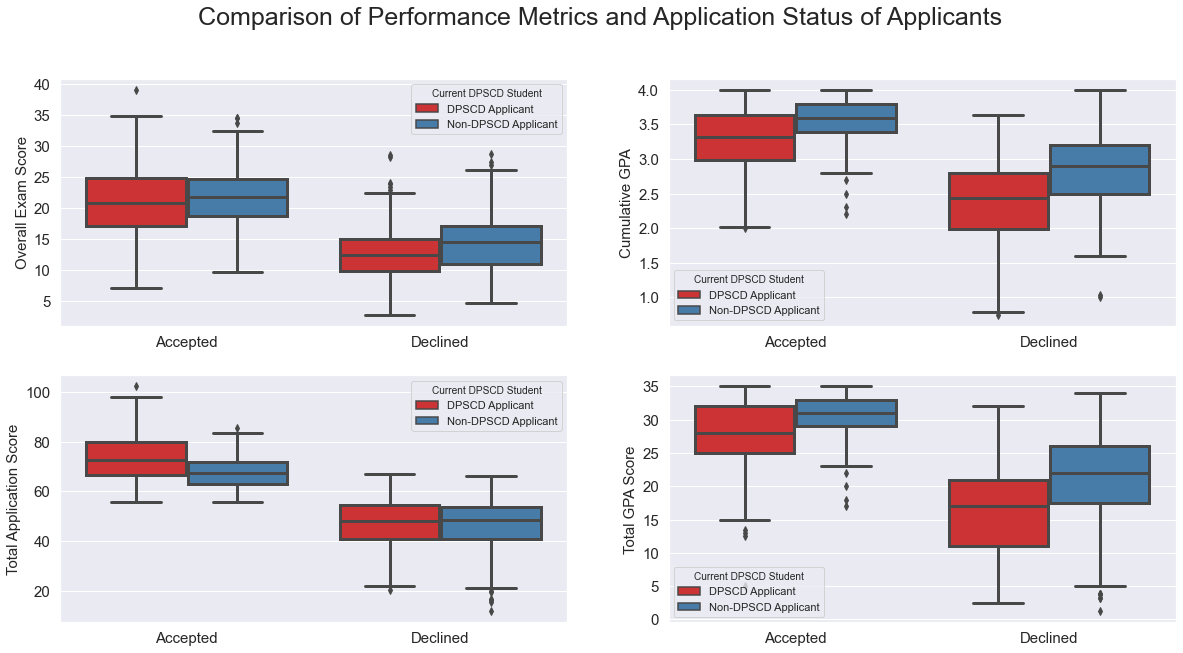

In [19]:
x = ['Application Status']
status_compare = ['Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']
plt.figure(figsize=(20, 10))
cnt = 1
for comp in status_compare:
    plt.subplot(2,2, cnt)
    plt.suptitle('Comparison of Performance Metrics and Application Status of Applicants', fontsize=25)
    sns.boxplot(x='Application Status', y=comp, data=school, hue="Current DPSCD Student", linewidth=3)
    plt.ylabel(comp, fontsize=15)
    plt.xlabel('')
    plt.tick_params(labelsize=15)
    plt.xticks(fontsize=15, horizontalalignment='center')
    cnt=cnt+1
plt.show()

Extract a dataframe of the target data and export to CSV for later use

In [20]:
application_stat_comparison = pd.DataFrame(school, columns=['Application Status','Current DPSCD Student', 'Cumulative GPA', 'Overall Exam Score', 'Essay Score', 'Total GPA Score','Total Application Score'])
application_stat_comparison.to_csv('application_stat_comparison.csv', index=False)

Parse data in **'Rank of Applicants Final Placement'** column 

In [21]:
First = school[school['Rank of Applicants Final Placement'].str.contains('First', na=False)]
Second = school[school['Rank of Applicants Final Placement'].str.contains('First|Second', na=False)]
Third = school[school['Rank of Applicants Final Placement'].str.contains('First|Third', na=False)]
Fourth = school[school['Rank of Applicants Final Placement'].str.contains('First|Fourth', na=False)]
Fifth = school[school['Rank of Applicants Final Placement'].str.contains('First|Fifth', na=False)]
Na = school[school['Rank of Applicants Final Placement'].str.contains('First|None', na=False)]

## What are the primary factors contributing to a student's acceptance to their top choice school? 

#### The next 5 plots display performance metrics of applicants who were placed in their top choice school realtive to applicants assigned elsewhere.

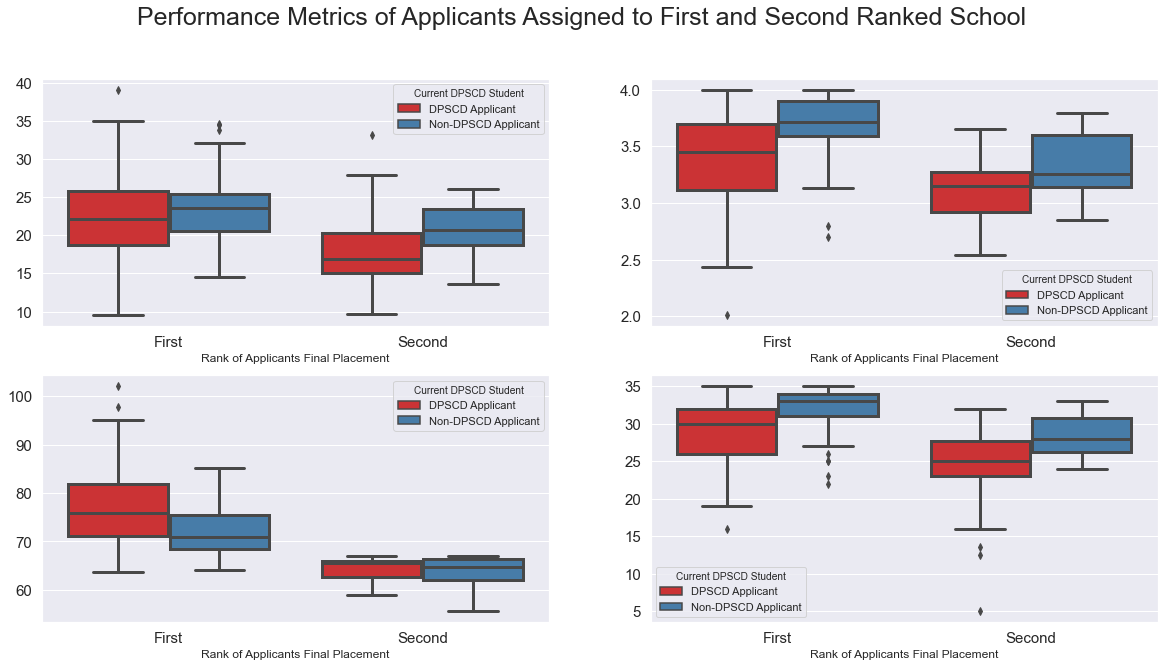

In [23]:
x = Second['Rank of Applicants Final Placement']
status_compare = ['Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']
plt.figure(figsize=(20, 10))
cnt = 1
for comp in status_compare:
    plt.subplot(2,2, cnt)
    plt.suptitle('Performance Metrics of Applicants Assigned to First and Second Ranked School', fontsize=25)
    sns.boxplot(x=Second['Rank of Applicants Final Placement'], y=comp, data=school, hue="Current DPSCD Student", linewidth=3)
   # plt.xlabel('First' + comp, fontsize=15)
    plt.ylabel('')
    plt.tick_params(labelsize=15)
    plt.xticks(fontsize=15, horizontalalignment='center')
    cnt=cnt+1
plt.show()

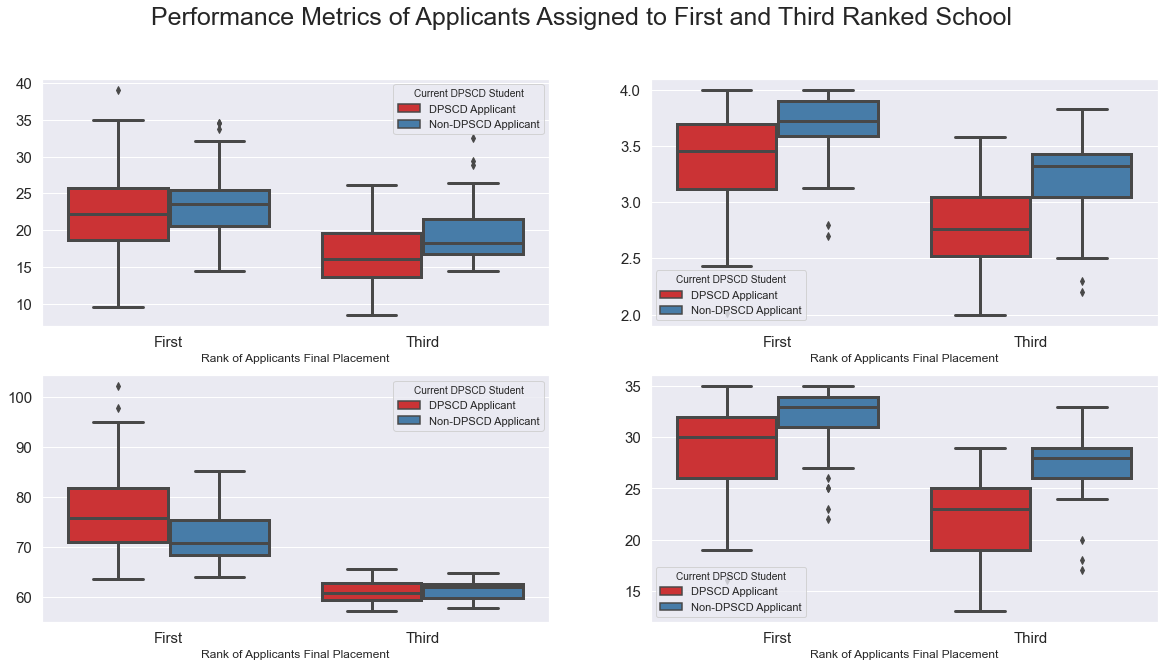

In [24]:
x = Third['Rank of Applicants Final Placement']
status_compare = ['Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']
plt.figure(figsize=(20, 10))
cnt = 1
for comp in status_compare:
    plt.subplot(2,2, cnt)
    plt.suptitle('Performance Metrics of Applicants Assigned to First and Third Ranked School', fontsize=25)
    sns.boxplot(x=x, y=comp, data=school, hue="Current DPSCD Student", linewidth=3)
    #plt.xlabel('First' + comp, fontsize=15)
    plt.ylabel('')
    plt.tick_params(labelsize=15)
    plt.xticks(fontsize=15, horizontalalignment='center')
    cnt=cnt+1
plt.show()

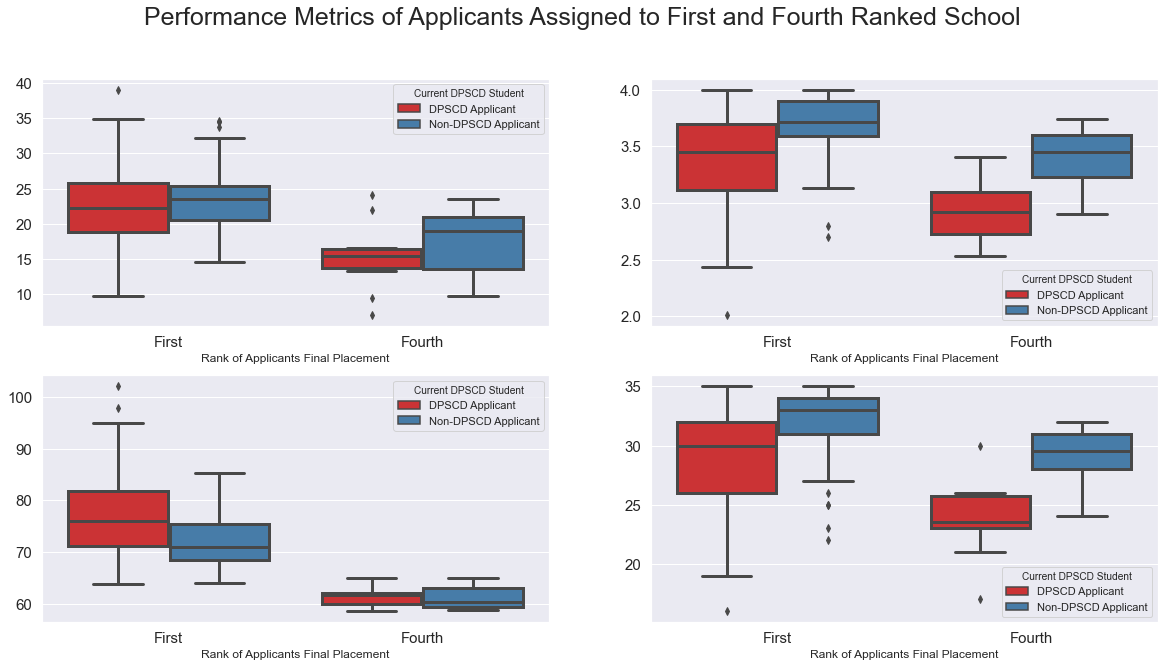

In [25]:
x = Fourth['Rank of Applicants Final Placement']
status_compare = ['Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']
plt.figure(figsize=(20, 10))
cnt = 1
for comp in status_compare:
    plt.subplot(2,2, cnt)
    plt.suptitle('Performance Metrics of Applicants Assigned to First and Fourth Ranked School', fontsize=25)
    sns.boxplot(x=x, y=comp, data=school, hue="Current DPSCD Student", linewidth=3)
   # plt.xlabel('First' + comp, fontsize=15)
    plt.ylabel('')
    plt.tick_params(labelsize=15)
    plt.xticks(fontsize=15, horizontalalignment='center')
    cnt=cnt+1
plt.show()

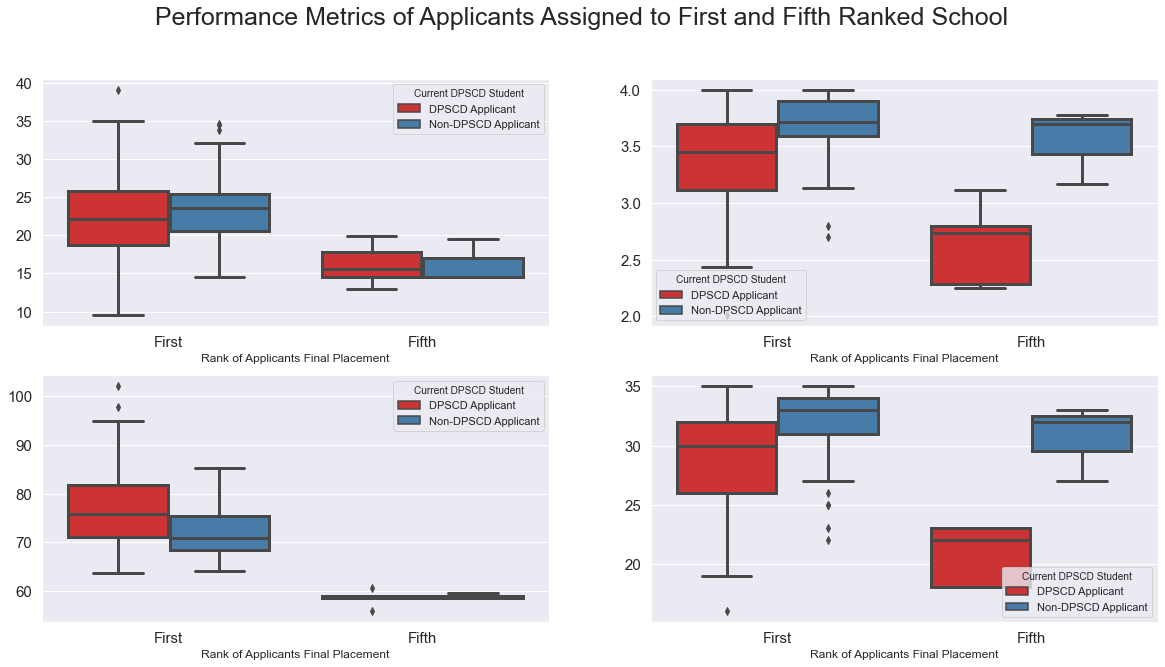

In [26]:
x = Fifth['Rank of Applicants Final Placement']
status_compare = ['Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']
plt.figure(figsize=(20, 10))
cnt = 1
for comp in status_compare:
    plt.subplot(2,2, cnt)
    plt.suptitle('Performance Metrics of Applicants Assigned to First and Fifth Ranked School', fontsize=25)
    sns.boxplot(x=x, y=comp, data=school, hue="Current DPSCD Student", linewidth=3)
    #plt.xlabel('First' + comp, fontsize=15)
    plt.ylabel('')
    plt.tick_params(labelsize=15)
    plt.xticks(fontsize=15, horizontalalignment='center')
    cnt=cnt+1
plt.show()

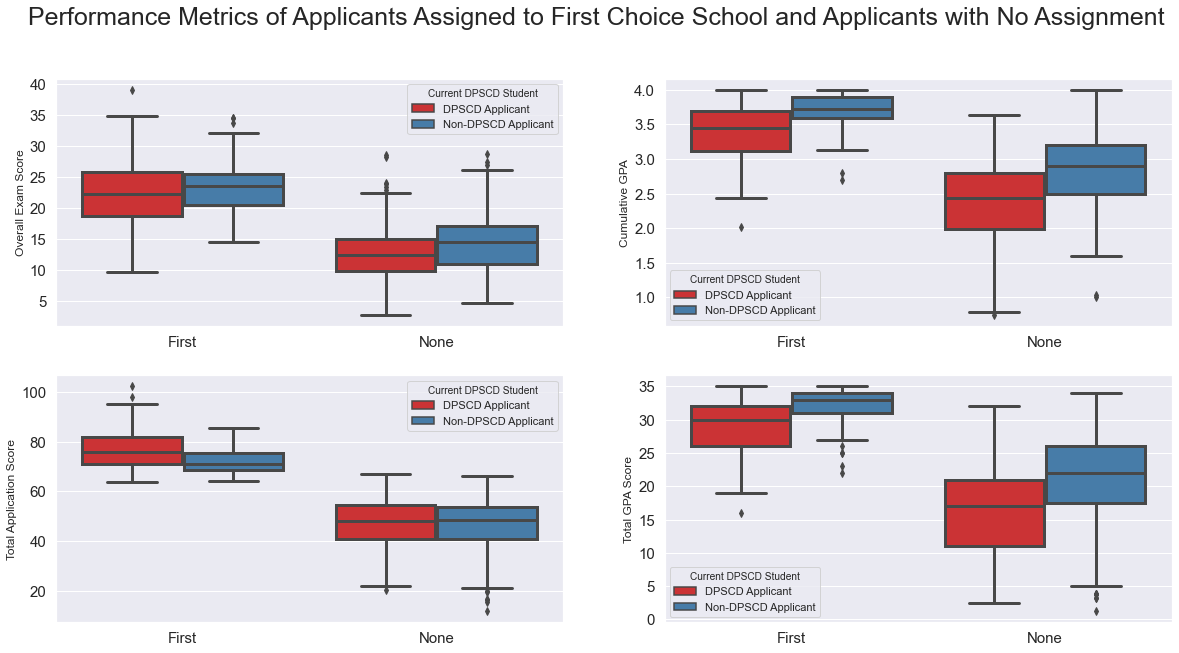

In [27]:
x = Na['Rank of Applicants Final Placement']
status_compare = ['Overall Exam Score', 'Cumulative GPA','Total Application Score', 'Total GPA Score']
plt.figure(figsize=(20, 10))
cnt = 1
for comp in status_compare:
    plt.subplot(2,2, cnt)
    plt.suptitle('Performance Metrics of Applicants Assigned to First Choice School and Applicants with No Assignment', fontsize=25)
    sns.boxplot(x=x, y=comp, data=school, hue="Current DPSCD Student", linewidth=3)
   # plt.ylabel('First' + comp, fontsize=15)
    plt.xlabel('')
    plt.tick_params(labelsize=15)
    plt.xticks(fontsize=15, horizontalalignment='center')
    cnt=cnt+1
plt.show()

Extract a dataframe of the target data and export to CSV for later use

In [28]:
Second = school[school['Rank of Applicants Final Placement'].str.contains('First|Second', na=False)]
Third = school[school['Rank of Applicants Final Placement'].str.contains('First|Third', na=False)]
Fourth = school[school['Rank of Applicants Final Placement'].str.contains('First|Fourth', na=False)]
Fifth = school[school['Rank of Applicants Final Placement'].str.contains('First|Fifth', na=False)]
Na = school[school['Rank of Applicants Final Placement'].str.contains('First|None', na=False)]

In [29]:
Second.to_csv('f_second.csv', index=False)
Third.to_csv('f_third.csv', index=False)
Fourth.to_csv('f_fourth.csv', index=False)
Fifth.to_csv('f_fifth.csv', index=False)
Na.to_csv('f_na.csv', index=False)

Extract a dataframe of the target data and export to CSV for later use

In [30]:
First = school[school['Rank of Applicants Final Placement'].str.contains('First', na=False)]
Second = school[school['Rank of Applicants Final Placement'].str.contains('Second', na=False)]
Third = school[school['Rank of Applicants Final Placement'].str.contains('Third', na=False)]
Fourth = school[school['Rank of Applicants Final Placement'].str.contains('Fourth', na=False)]
Fifth = school[school['Rank of Applicants Final Placement'].str.contains('Fifth', na=False)]
Na = school[school['Rank of Applicants Final Placement'].str.contains('None', na=False)]

In [31]:
First.to_csv('first.csv')
Second.to_csv('second.csv', index=False)
Third.to_csv('third.csv', index=False)
Fourth.to_csv('fourth.csv', index=False)
Fifth.to_csv('fifth.csv', index=False)
Na.to_csv('na.csv', index=False)